In [1]:
library(dplyr)
library(car)
library(ggplot2)
library(lm.beta)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.6.3"
Attaching package: 'car'

The following object is masked from 'package:dplyr':

    recode

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# 코로나변수 포함

In [5]:
전체<-read.csv('전체데이터_병합.csv')

In [6]:
head(전체)
tail(전체)

y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
2018-01,서귀포시,남원읍,52,9570,42437700,1270773,9306,200,9806,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2018-01,서귀포시,대륜동,38,21666,57612600,1676850,6637,95,6836,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
2018-01,서귀포시,대정읍,89,10185,38885550,1164122,10725,677,10360,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
2018-01,서귀포시,대천동,37,20280,53858550,1593709,6475,137,6685,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
2018-01,서귀포시,동홍동,49,45936,118701000,3501286,11569,642,11124,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
2018-01,서귀포시,서홍동,24,15597,47230450,1397423,5335,66,5302,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257


,y_m,city,location,area_cnt,em_cnt,em_g,pay_amt,제주도민_여,외국인거주_여,제주도민_남,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1661,2021-06,제주시,일도1동,10,2707,7451200,222864,1156,35,1309,...,23.29986,75.79306,5.058333,156961,16603,1264,234,1033.437,177.7893,6.572199
1662,2021-06,제주시,일도2동,87,84360,147438200,4402149,16569,200,16077,...,23.29986,75.79306,5.058333,156961,16603,1264,234,2601.794,210.2710,11.877085
1663,2021-06,제주시,조천읍,141,27732,63927750,1911187,12422,242,13017,...,22.02597,82.50556,6.250000,156961,16603,1264,234,13478.916,377.1124,30.738787
1664,2021-06,제주시,한경면,71,8031,27060150,809898,4531,100,4627,...,22.40750,93.73750,7.270833,156961,16603,1264,234,3886.112,603.8101,13.838063
1665,2021-06,제주시,한림읍,112,25653,82746990,2476292,10341,1140,10891,...,22.53750,92.99583,6.758333,156961,16603,1264,234,11498.612,607.9278,28.297822
1666,2021-06,제주시,화북동,84,66088,110750050,3306029,12238,161,12062,...,23.29986,75.79306,5.058333,156961,16603,1264,234,2410.348,157.5394,10.453663


In [7]:
전체<-subset(전체,select=-c(em_cnt,pay_amt)) #타겟변수인 배출량과 상관성이 너무크다.
전체<-subset(전체,location!="알수없음") 
전체

,y_m,city,location,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1,2018-01,서귀포시,남원읍,52,42437700,9306,200,9806,428,5554,...,6.256586,62.92070,1.891667,0,0,0,0,7650.916,469.7003,1686.0106
2,2018-01,서귀포시,대륜동,38,57612600,6637,95,6836,83,2925,...,8.004301,66.79301,2.958333,0,0,0,0,7964.611,371.7235,420.8336
3,2018-01,서귀포시,대정읍,89,38885550,10725,677,10360,841,5330,...,5.417876,70.94086,1.870833,0,0,0,0,4994.301,410.5112,356.2630
4,2018-01,서귀포시,대천동,37,53858550,6475,137,6685,107,2372,...,8.004301,66.79301,2.958333,0,0,0,0,4671.394,234.2381,225.5745
5,2018-01,서귀포시,동홍동,49,118701000,11569,642,11124,624,3898,...,5.771505,69.94489,3.812500,0,0,0,0,3881.022,270.2584,353.6994
6,2018-01,서귀포시,서홍동,24,47230450,5335,66,5302,61,1857,...,5.771505,69.94489,3.812500,0,0,0,0,1671.296,426.8739,1355.5257
7,2018-01,서귀포시,성산읍,74,11343100,7332,560,8006,1015,4642,...,4.979167,67.88172,1.879167,0,0,0,0,11249.047,618.5432,785.5332
8,2018-01,서귀포시,송산동,20,22834700,2111,157,2344,366,1298,...,7.498925,63.95296,2.262500,0,0,0,0,1888.063,958.0544,151.0939
9,2018-01,서귀포시,안덕면,67,10007850,5524,264,5938,258,3031,...,5.869355,69.06855,2.150000,0,0,0,0,10304.252,472.3279,722.1710
10,2018-01,서귀포시,영천동,35,26620950,2526,60,2640,111,1514,...,5.847849,70.98925,1.537500,0,0,0,0,2474.981,414.1342,314.5992


In [20]:
코로나포함<-전체[c(979:1634),]
head(코로나포함)
tail(코로나포함)

,y_m,city,location,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
998,2020-03,서귀포시,남원읍,52,62658150,9132,274,9692,517,6022,...,11.79866,68.18952,5.541667,9786,4974,9,6,3750.636,819.0143,393.7733
999,2020-03,서귀포시,대륜동,38,56525400,7165,116,7299,98,3305,...,11.05161,64.24597,4.354167,9786,4974,9,6,4236.798,341.2169,113.1649
1000,2020-03,서귀포시,대정읍,89,103538750,10914,786,10424,982,5758,...,10.53293,64.72581,5.208333,9786,4974,9,6,3509.561,463.6697,186.0824
1001,2020-03,서귀포시,대천동,37,57795350,6769,121,6988,96,2666,...,11.05161,64.24597,4.354167,9786,4974,9,6,2461.475,237.8020,106.1283
1002,2020-03,서귀포시,동홍동,49,122303100,11826,639,11361,606,4532,...,12.09086,73.53629,5.612500,9786,4974,9,6,2875.031,487.2732,220.7488
1003,2020-03,서귀포시,서홍동,24,42033800,5261,54,5190,65,2046,...,12.09086,73.53629,5.612500,9786,4974,9,6,1273.642,748.0870,1357.4184


,y_m,city,location,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
1661,2021-06,제주시,일도1동,10,7451200,1156,35,1309,42,984,...,23.29986,75.79306,5.058333,156961,16603,1264,234,1033.437,177.7893,6.572199
1662,2021-06,제주시,일도2동,87,147438200,16569,200,16077,75,7786,...,23.29986,75.79306,5.058333,156961,16603,1264,234,2601.794,210.2710,11.877085
1663,2021-06,제주시,조천읍,141,63927750,12422,242,13017,279,6788,...,22.02597,82.50556,6.250000,156961,16603,1264,234,13478.916,377.1124,30.738787
1664,2021-06,제주시,한경면,71,27060150,4531,100,4627,237,3440,...,22.40750,93.73750,7.270833,156961,16603,1264,234,3886.112,603.8101,13.838063
1665,2021-06,제주시,한림읍,112,82746990,10341,1140,10891,2090,6463,...,22.53750,92.99583,6.758333,156961,16603,1264,234,11498.612,607.9278,28.297822
1666,2021-06,제주시,화북동,84,110750050,12238,161,12062,169,4812,...,23.29986,75.79306,5.058333,156961,16603,1264,234,2410.348,157.5394,10.453663


In [21]:
변수제거<-subset(코로나포함,select=-c(y_m,city,location))
변수제거

,area_cnt,em_g,제주도민_여,외국인거주_여,제주도민_남,외국인거주_남,제주도민_60이상,제주도민_60미만,total_pop,패스트푸드_결제건수,...,기온,습도,강수,전국_누적확진자,전국_월별확진자,제주_누적확진자,제주_월별확진자,visit_pop_cnt,visit_pop_cnt_lf,visit_pop_cnt_sf
998,52,62658150,9132,274,9692,517,6022,13593,19615,3335,...,11.798656,68.18952,5.541667,9786,4974,9,6,3750.6356,819.0143,393.77330
999,38,56525400,7165,116,7299,98,3305,11373,14678,5860,...,11.051613,64.24597,4.354167,9786,4974,9,6,4236.7984,341.2169,113.16487
1000,89,103538750,10914,786,10424,982,5758,17348,23106,6755,...,10.532930,64.72581,5.208333,9786,4974,9,6,3509.5612,463.6697,186.08238
1001,37,57795350,6769,121,6988,96,2666,11308,13974,6275,...,11.051613,64.24597,4.354167,9786,4974,9,6,2461.4748,237.8020,106.12827
1002,49,122303100,11826,639,11361,606,4532,19900,24432,8375,...,12.090860,73.53629,5.612500,9786,4974,9,6,2875.0310,487.2732,220.74884
1003,24,42033800,5261,54,5190,65,2046,8524,10570,4285,...,12.090860,73.53629,5.612500,9786,4974,9,6,1273.6423,748.0870,1357.41838
1004,74,46373628,7301,595,8040,1171,5117,11990,17107,2790,...,10.702554,63.91935,4.645833,9786,4974,9,6,6483.5110,839.2525,196.78959
1005,20,24734100,2010,173,2235,423,1380,3461,4841,1190,...,12.090860,73.53629,5.612500,9786,4974,9,6,1130.3112,1230.4690,75.51911
1006,67,36068850,5792,337,6228,317,3333,9341,12674,3550,...,11.051613,64.24597,4.354167,9786,4974,9,6,5513.9031,604.8202,194.43745
1007,35,14617800,2599,61,2698,123,1666,3815,5481,1465,...,12.087231,73.52554,5.612500,9786,4974,9,6,1550.0700,759.9341,146.16386


# 0.선형성

In [22]:
다중회귀1<-lm(em_g ~ .,data=변수제거)
summary(다중회귀1)


Call:
lm(formula = em_g ~ ., data = 변수제거)

Residuals:
      Min        1Q    Median        3Q       Max 
-27757421  -6165341    178915   5205764  40657448 

Coefficients: (2 not defined because of singularities)
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.003e+05  5.190e+06   0.077 0.938548    
area_cnt               -2.042e+05  4.943e+04  -4.132 4.08e-05 ***
제주도민_여             2.124e+04  2.759e+03   7.699 5.40e-14 ***
외국인거주_여           7.065e+03  9.483e+03   0.745 0.456546    
제주도민_남            -1.883e+04  2.416e+03  -7.794 2.73e-14 ***
외국인거주_남           7.534e+03  4.985e+03   1.511 0.131239    
제주도민_60이상         2.720e+03  1.153e+03   2.359 0.018636 *  
제주도민_60미만                NA         NA      NA       NA    
total_pop                      NA         NA      NA       NA    
패스트푸드_결제건수     3.790e+03  1.340e+03   2.827 0.004846 ** 
패스트푸드_결제금액     1.022e-01  6.506e-02   1.571 0.116616    
간식_결제건수           4.646e+03  1.068e+03   4.351 

In [23]:
cor(변수제거$제주도민_60미만,변수제거$em_g)
cor(변수제거$em_g,변수제거$total_pop)

[1] 0.9401019

[1] 0.9289557

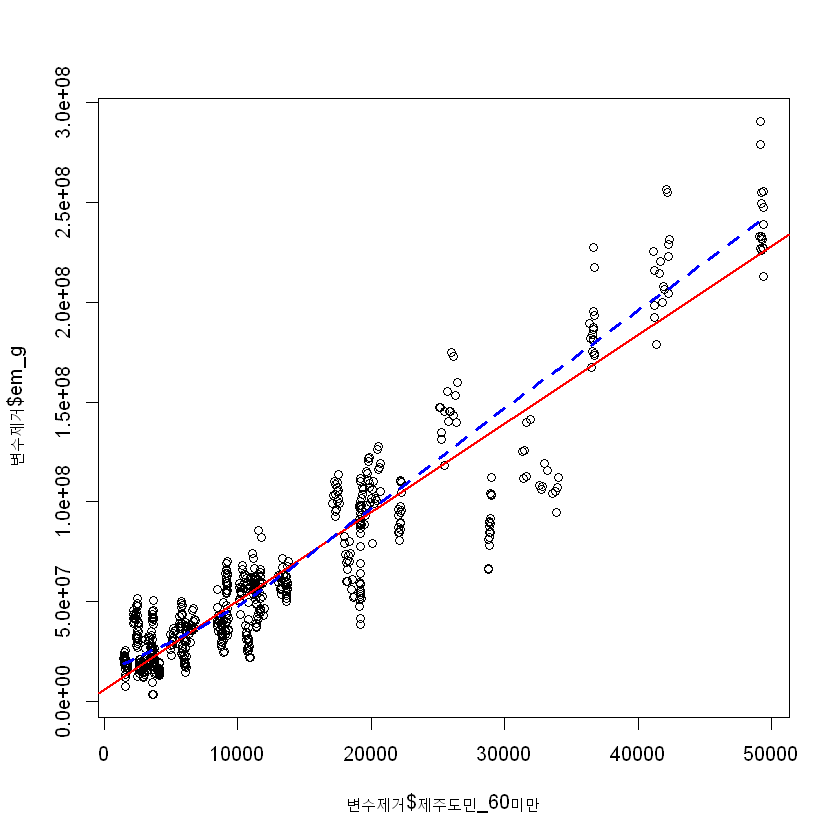

In [24]:
par(mfrow=c(1,1))
plot(변수제거$제주도민_60미만,변수제거$em_g)
abline(lm(변수제거$em_g~변수제거$제주도민_60미만),col="red",lwd=2,lty=1)
lines(lowess(변수제거$제주도민_60미만,변수제거$em_g),col="blue",lwd=3,lty=2)


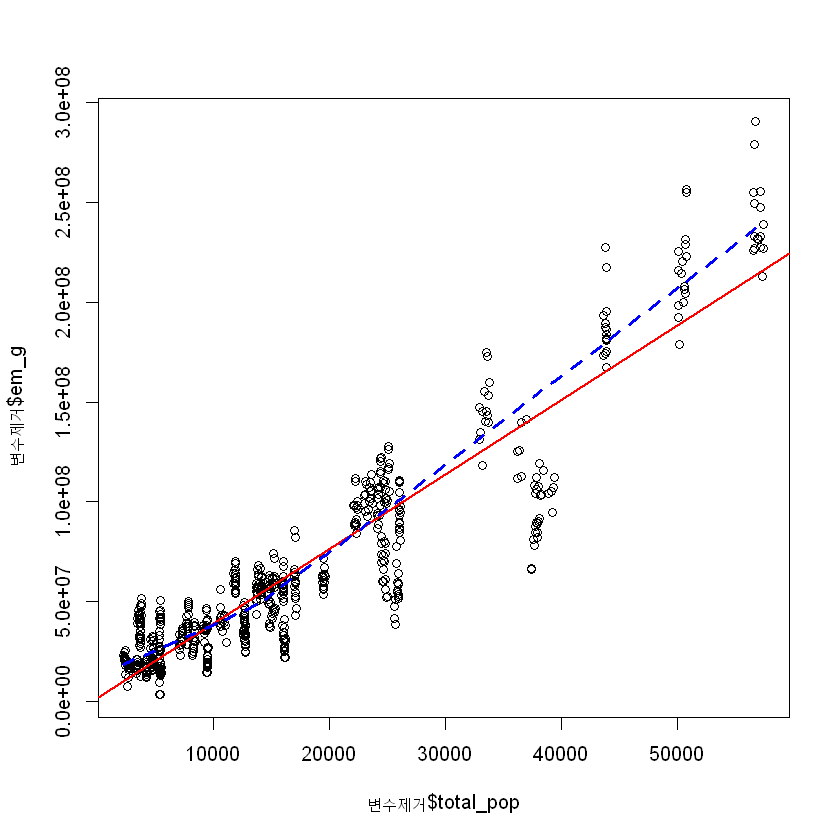

In [25]:
par(mfrow=c(1,1))
plot(변수제거$total_pop,변수제거$em_g)
abline(lm(변수제거$em_g~변수제거$total_pop),col="red",lwd=2,lty=1)
lines(lowess(변수제거$total_pop,변수제거$em_g),col="blue",lwd=3,lty=2)



In [26]:
#total_pop,제주도민60미만제거
선형성1<-subset(변수제거,select=-c(total_pop,제주도민_60미만))
다중회귀2<-lm(em_g ~ .,data=선형성1)
summary(다중회귀2)


Call:
lm(formula = em_g ~ ., data = 선형성1)

Residuals:
      Min        1Q    Median        3Q       Max 
-27757421  -6165341    178915   5205764  40657448 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             4.003e+05  5.190e+06   0.077 0.938548    
area_cnt               -2.042e+05  4.943e+04  -4.132 4.08e-05 ***
제주도민_여             2.124e+04  2.759e+03   7.699 5.40e-14 ***
외국인거주_여           7.065e+03  9.483e+03   0.745 0.456546    
제주도민_남            -1.883e+04  2.416e+03  -7.794 2.73e-14 ***
외국인거주_남           7.534e+03  4.985e+03   1.511 0.131239    
제주도민_60이상         2.720e+03  1.153e+03   2.359 0.018636 *  
패스트푸드_결제건수     3.790e+03  1.340e+03   2.827 0.004846 ** 
패스트푸드_결제금액     1.022e-01  6.506e-02   1.571 0.116616    
간식_결제건수           4.646e+03  1.068e+03   4.351 1.59e-05 ***
간식_결제금액          -3.386e-01  6.853e-02  -4.940 1.00e-06 ***
농축수산물_결제건수     2.147e+02  3.716e+02   0.578 0.563578    
농축수산물_결제금액     2.408e-02  7.857e-03  

# 1. 다중공선성

In [27]:
backward <- step(다중회귀2, direction = "backward", trace = T)
backward
backward$anova 

Start:  AIC=21161.9
em_g ~ area_cnt + 제주도민_여 + 외국인거주_여 + 제주도민_남 + 
    외국인거주_남 + 제주도민_60이상 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제건수 + 간식_결제금액 + 농축수산물_결제건수 + 농축수산물_결제금액 + 
    마트.슈퍼마켓_결제건수 + 마트.슈퍼마켓_결제금액 + 식품_결제건수 + 
    식품_결제금액 + 배달_결제건수 + 배달_결제금액 + 식당_결제건수 + 
    식당_결제금액 + 풍속 + 기온 + 습도 + 강수 + 전국_누적확진자 + 
    전국_월별확진자 + 제주_누적확진자 + 제주_월별확진자 + visit_pop_cnt + 
    visit_pop_cnt_lf + visit_pop_cnt_sf

                         Df  Sum of Sq        RSS   AIC
- visit_pop_cnt_sf        1 9.2265e+11 6.0875e+16 21160
- 배달_결제금액           1 1.8765e+12 6.0876e+16 21160
- 식품_결제건수           1 1.5847e+13 6.0890e+16 21160
- visit_pop_cnt_lf        1 1.8254e+13 6.0893e+16 21160
- 배달_결제건수           1 3.1734e+13 6.0906e+16 21160
- 농축수산물_결제건수     1 3.2574e+13 6.0907e+16 21160
- 외국인거주_여           1 5.4147e+13 6.0929e+16 21161
- 식품_결제금액           1 9.9207e+13 6.0974e+16 21161
<none>                                 6.0874e+16 21162
- visit_pop_cnt           1 2.1139e+14 6.1086e+16 21162
- 외국인거주_남           1


Call:
lm(formula = em_g ~ area_cnt + 제주도민_여 + 제주도민_남 + 외국인거주_남 + 
    제주도민_60이상 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제건수 + 간식_결제금액 + 농축수산물_결제금액 + 마트.슈퍼마켓_결제건수 + 
    마트.슈퍼마켓_결제금액 + 식품_결제금액 + 배달_결제건수 + 
    식당_결제건수 + 식당_결제금액 + 풍속 + 기온 + 습도 + 강수 + 
    전국_누적확진자 + 전국_월별확진자 + 제주_누적확진자 + 제주_월별확진자 + 
    visit_pop_cnt, data = 선형성1)

Coefficients:
           (Intercept)                area_cnt             제주도민_여  
             1.881e+06              -2.197e+05               2.190e+04  
           제주도민_남           외국인거주_남         제주도민_60이상  
            -1.928e+04               1.144e+04               2.402e+03  
   패스트푸드_결제건수     패스트푸드_결제금액           간식_결제건수  
             3.218e+03               1.206e-01               4.914e+03  
         간식_결제금액     농축수산물_결제금액  마트.슈퍼마켓_결제건수  
            -3.514e-01               2.674e-02               8.900e+02  
마트.슈퍼마켓_결제금액           식품_결제금액           배달_결제건수  
            -2.254e-02               7.224e-03               3.539e+02  
         식당_결제건수   

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,624,6.087438e+16,21161.90
- visit_pop_cnt_sf,1,9.226500e+11,625,6.087530e+16,21159.91
- 배달_결제금액,1,2.020641e+12,626,6.087732e+16,21157.93
- 식품_결제건수,1,1.493192e+13,627,6.089226e+16,21156.09
- visit_pop_cnt_lf,1,2.998133e+13,628,6.092224e+16,21154.41
- 농축수산물_결제건수,1,3.199490e+13,629,6.095423e+16,21152.76
- 외국인거주_여,1,8.260311e+13,630,6.103683e+16,21151.65


In [28]:
#위 변수들 제거
선형성2<-subset(선형성1,select=-c(visit_pop_cnt_lf,visit_pop_cnt_sf,배달_결제금액,식품_결제건수,농축수산물_결제건수,외국인거주_여))
다중회귀3<-lm(em_g ~ .,data=선형성2)
summary(다중회귀3)


Call:
lm(formula = em_g ~ ., data = 선형성2)

Residuals:
      Min        1Q    Median        3Q       Max 
-28032742  -5996467    154780   5144777  40435283 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             1.881e+06  4.795e+06   0.392 0.695043    
area_cnt               -2.197e+05  4.134e+04  -5.314 1.49e-07 ***
제주도민_여             2.190e+04  2.433e+03   9.003  < 2e-16 ***
제주도민_남            -1.928e+04  2.116e+03  -9.112  < 2e-16 ***
외국인거주_남           1.144e+04  1.449e+03   7.899 1.26e-14 ***
제주도민_60이상         2.402e+03  9.670e+02   2.484 0.013258 *  
패스트푸드_결제건수     3.218e+03  1.234e+03   2.609 0.009305 ** 
패스트푸드_결제금액     1.206e-01  6.221e-02   1.939 0.052979 .  
간식_결제건수           4.914e+03  1.002e+03   4.905 1.19e-06 ***
간식_결제금액          -3.514e-01  6.397e-02  -5.493 5.73e-08 ***
농축수산물_결제금액     2.674e-02  5.679e-03   4.709 3.07e-06 ***
마트.슈퍼마켓_결제건수  8.900e+02  1.202e+02   7.402 4.32e-13 ***
마트.슈퍼마켓_결제금액 -2.254e-02  3.491e-03  -6.45

In [29]:
#확인
backward2 <- step(다중회귀3, direction = "backward", trace = T)
backward2
backward2$anova 

Start:  AIC=21151.65
em_g ~ area_cnt + 제주도민_여 + 제주도민_남 + 외국인거주_남 + 
    제주도민_60이상 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제건수 + 간식_결제금액 + 농축수산물_결제금액 + 마트.슈퍼마켓_결제건수 + 
    마트.슈퍼마켓_결제금액 + 식품_결제금액 + 배달_결제건수 + 
    식당_결제건수 + 식당_결제금액 + 풍속 + 기온 + 습도 + 강수 + 
    전국_누적확진자 + 전국_월별확진자 + 제주_누적확진자 + 제주_월별확진자 + 
    visit_pop_cnt

                         Df  Sum of Sq        RSS   AIC
<none>                                 6.1037e+16 21152
- 강수                    1 2.3750e+14 6.1274e+16 21152
- 식품_결제금액           1 3.2645e+14 6.1363e+16 21153
- 패스트푸드_결제금액     1 3.6416e+14 6.1401e+16 21154
- visit_pop_cnt           1 4.4898e+14 6.1486e+16 21155
- 제주_누적확진자         1 4.6365e+14 6.1500e+16 21155
- 습도                    1 4.7226e+14 6.1509e+16 21155
- 배달_결제건수           1 5.2228e+14 6.1559e+16 21155
- 기온                    1 5.2390e+14 6.1561e+16 21155
- 전국_누적확진자         1 5.5355e+14 6.1590e+16 21156
- 제주도민_60이상         1 5.9770e+14 6.1635e+16 21156
- 패스트푸드_결제건수     1 6.5931e+14 6.1696e+16 21157
- 제주_월별확진자 


Call:
lm(formula = em_g ~ area_cnt + 제주도민_여 + 제주도민_남 + 외국인거주_남 + 
    제주도민_60이상 + 패스트푸드_결제건수 + 패스트푸드_결제금액 + 
    간식_결제건수 + 간식_결제금액 + 농축수산물_결제금액 + 마트.슈퍼마켓_결제건수 + 
    마트.슈퍼마켓_결제금액 + 식품_결제금액 + 배달_결제건수 + 
    식당_결제건수 + 식당_결제금액 + 풍속 + 기온 + 습도 + 강수 + 
    전국_누적확진자 + 전국_월별확진자 + 제주_누적확진자 + 제주_월별확진자 + 
    visit_pop_cnt, data = 선형성2)

Coefficients:
           (Intercept)                area_cnt             제주도민_여  
             1.881e+06              -2.197e+05               2.190e+04  
           제주도민_남           외국인거주_남         제주도민_60이상  
            -1.928e+04               1.144e+04               2.402e+03  
   패스트푸드_결제건수     패스트푸드_결제금액           간식_결제건수  
             3.218e+03               1.206e-01               4.914e+03  
         간식_결제금액     농축수산물_결제금액  마트.슈퍼마켓_결제건수  
            -3.514e-01               2.674e-02               8.900e+02  
마트.슈퍼마켓_결제금액           식품_결제금액           배달_결제건수  
            -2.254e-02               7.224e-03               3.539e+02  
         식당_결제건수   

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,630,6.103683e+16,21151.65


In [30]:
vif(다중회귀3) #분산팽창계수 확인

area_cnt            제주도민_여            제주도민_남 
             21.332288            1735.267969            1236.807810 
         외국인거주_남        제주도민_60이상    패스트푸드_결제건수 
              2.535182              33.650561             295.570383 
   패스트푸드_결제금액          간식_결제건수          간식_결제금액 
            196.499909             400.836020             228.052642 
   농축수산물_결제금액 마트.슈퍼마켓_결제건수 마트.슈퍼마켓_결제금액 
              8.025715              97.836781              78.625456 
         식품_결제금액          배달_결제건수          식당_결제건수 
             18.925688              20.586464            1204.526686 
         식당_결제금액                   풍속                   기온 
            719.685242               2.526613               3.858219 
                  습도                   강수        전국_누적확진자 
              3.137031               2.174285             115.415163 
       전국_월별확진자        제주_누적확진자        제주_월별확진자 
             13.513770             113.204487              10.157388 
         visit_pop_cnt 
              4.268959

### 공선성 제거 (인구자료 목표)

In [31]:
#공선성원인제거(인구자료 목표) 
선형성3<-subset(선형성2,select=-c(패스트푸드_결제건수,패스트푸드_결제금액,간식_결제건수,간식_결제금액,농축수산물_결제금액,마트.슈퍼마켓_결제건수,마트.슈퍼마켓_결제금액,식품_결제금액,배달_결제건수,식당_결제건수,식당_결제금액))
다중회귀4<-lm(em_g ~ .,data=선형성3)
summary(다중회귀4)
vif(다중회귀4)


Call:
lm(formula = em_g ~ ., data = 선형성3)

Residuals:
      Min        1Q    Median        3Q       Max 
-56125136  -6493417    188663   6037018  44174789 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.246e+07  5.560e+06   2.241 0.025339 *  
area_cnt        -2.914e+05  4.410e+04  -6.608 8.18e-11 ***
제주도민_여      3.521e+04  1.693e+03  20.796  < 2e-16 ***
제주도민_남     -2.686e+04  1.922e+03 -13.974  < 2e-16 ***
외국인거주_남    1.023e+04  1.486e+03   6.883 1.40e-11 ***
제주도민_60이상 -9.048e+02  6.472e+02  -1.398 0.162579    
풍속            -1.637e+06  6.889e+05  -2.376 0.017804 *  
기온             1.009e+06  1.372e+05   7.354 5.88e-13 ***
습도            -8.144e+04  7.911e+04  -1.030 0.303620    
강수            -3.641e+05  1.315e+05  -2.770 0.005766 ** 
전국_누적확진자 -4.229e+02  9.239e+01  -4.578 5.65e-06 ***
전국_월별확진자  1.083e+03  2.071e+02   5.230 2.30e-07 ***
제주_누적확진자  4.297e+04  1.156e+04   3.718 0.000219 ***
제주_월별확진자 -4.026e+04  1.291e+04  -3.119 0.001897 ** 
v

area_cnt     제주도민_여     제주도민_남   외국인거주_남 제주도민_60이상 
      16.450389      569.332918      691.432170        1.806625       10.213433 
           풍속            기온            습도            강수 전국_누적확진자 
       2.406008        3.277636        2.844665        1.864922       95.346793 
전국_월별확진자 제주_누적확진자 제주_월별확진자   visit_pop_cnt 
      12.150298       94.758874        9.415488        3.372417

In [32]:
#제주도민_남 제거
선형성3<-subset(선형성3,select=-c(제주도민_남))
다중회귀4<-lm(em_g ~ .,data=선형성3)
summary(다중회귀4)
vif(다중회귀4)


Call:
lm(formula = em_g ~ ., data = 선형성3)

Residuals:
      Min        1Q    Median        3Q       Max 
-62375968  -7356237   -339632   7904283  44905098 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -1.900e+06  6.237e+06  -0.305 0.760746    
area_cnt        -5.648e+05  4.511e+04 -12.521  < 2e-16 ***
제주도민_여      1.181e+04  2.841e+02  41.560  < 2e-16 ***
외국인거주_남    1.470e+04  1.656e+03   8.878  < 2e-16 ***
제주도민_60이상 -4.428e+03  6.803e+02  -6.508 1.54e-10 ***
풍속             1.209e+06  7.512e+05   1.610 0.107942    
기온             1.204e+06  1.558e+05   7.724 4.35e-14 ***
습도            -3.720e+04  9.021e+04  -0.412 0.680182    
강수            -4.587e+05  1.498e+05  -3.061 0.002296 ** 
전국_누적확진자 -3.671e+02  1.053e+02  -3.485 0.000526 ***
전국_월별확진자  1.042e+03  2.364e+02   4.409 1.22e-05 ***
제주_누적확진자  3.690e+04  1.318e+04   2.799 0.005278 ** 
제주_월별확진자 -3.381e+04  1.473e+04  -2.296 0.021988 *  
visit_pop_cnt   -3.538e+01  2.477e+02  -0.143 0.886436 

area_cnt     제주도민_여   외국인거주_남 제주도민_60이상            풍속 
      13.212970       12.306116        1.722745        8.663986        2.195758 
           기온            습도            강수 전국_누적확진자 전국_월별확진자 
       3.243992        2.840110        1.859984       95.168478       12.147852 
제주_누적확진자 제주_월별확진자   visit_pop_cnt 
      94.624995        9.403443        3.266526

In [33]:
#전국_누적확진자 제거
선형성3<-subset(선형성3,select=-c(전국_누적확진자))
다중회귀4<-lm(em_g ~ .,data=선형성3)
summary(다중회귀4)
vif(다중회귀4)


Call:
lm(formula = em_g ~ ., data = 선형성3)

Residuals:
      Min        1Q    Median        3Q       Max 
-64366424  -7482086   -343815   8088603  47143146 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -9098109.3  5935692.6  -1.533 0.125822    
area_cnt         -560365.7    45481.1 -12.321  < 2e-16 ***
제주도민_여        11832.9      286.4  41.315  < 2e-16 ***
외국인거주_남      14652.5     1670.0   8.774  < 2e-16 ***
제주도민_60이상    -4472.7      686.1  -6.519 1.43e-10 ***
풍속             1278045.2   757373.5   1.687 0.091998 .  
기온             1030624.0   148986.3   6.918 1.11e-11 ***
습도               53001.4    87165.2   0.608 0.543365    
강수             -461487.2   151120.8  -3.054 0.002353 ** 
전국_월별확진자      505.9      181.0   2.796 0.005336 ** 
제주_누적확진자    -8324.6     2331.9  -3.570 0.000384 ***
제주_월별확진자     3387.8    10230.2   0.331 0.740635    
visit_pop_cnt       -115.2      248.7  -0.463 0.643520    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 

area_cnt     제주도민_여   외국인거주_남 제주도민_60이상            풍속 
      13.202276       12.296902        1.722630        8.660850        2.194238 
           기온            습도            강수 전국_월별확진자 제주_누적확진자 
       2.914460        2.606259        1.859930        6.999414        2.910701 
제주_월별확진자   visit_pop_cnt 
       4.461330        3.238612

In [34]:
#제주_월별확진자,visit_pop_cnt,습도,풍속제거 (pvalue 기준)
선형성3<-subset(선형성3,select=-c(제주_월별확진자,visit_pop_cnt,습도,풍속))
다중회귀4<-lm(em_g ~ .,data=선형성3)
summary(다중회귀4)
vif(다중회귀4)


Call:
lm(formula = em_g ~ ., data = 선형성3)

Residuals:
      Min        1Q    Median        3Q       Max 
-64701453  -7665296   -210331   8082960  47172066 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2829396.1  2498890.0  -1.132 0.257944    
area_cnt         -535776.5    32908.0 -16.281  < 2e-16 ***
제주도민_여        11653.4      204.7  56.918  < 2e-16 ***
외국인거주_남      14135.3     1639.1   8.624  < 2e-16 ***
제주도민_60이상    -4319.3      592.8  -7.287 9.28e-13 ***
기온             1033458.8   122121.3   8.463  < 2e-16 ***
강수             -457415.8   135377.1  -3.379 0.000772 ***
전국_월별확진자      552.0      129.3   4.271 2.24e-05 ***
제주_누적확진자    -8378.7     2306.9  -3.632 0.000303 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 13770000 on 647 degrees of freedom
Multiple R-squared:  0.935,	Adjusted R-squared:  0.9342 
F-statistic:  1164 on 8 and 647 DF,  p-value: < 2.2e-16


area_cnt     제주도민_여   외국인거주_남 제주도민_60이상            기온 
       6.905303        6.277913        1.657977        6.458902        1.956319 
           강수 전국_월별확진자 제주_누적확진자 
       1.491179        3.567619        2.846078

### 공선성 제거(결제자료 목표)

In [35]:
#공선성제거(결제자료 목표)->인구관련 우선제거
선형성4<-subset(선형성2,select=-c(area_cnt,제주도민_여,제주도민_남,외국인거주_남,제주도민_60이상,visit_pop_cnt))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-33060291  -7022565   -780648   6596683  61510087 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.384e+06  5.486e+06  -0.981 0.326750    
패스트푸드_결제건수     3.316e+03  1.209e+03   2.744 0.006242 ** 
패스트푸드_결제금액     7.057e-02  6.266e-02   1.126 0.260478    
간식_결제건수           1.023e+04  1.099e+03   9.309  < 2e-16 ***
간식_결제금액          -5.415e-01  7.243e-02  -7.476 2.55e-13 ***
농축수산물_결제금액     5.385e-02  5.989e-03   8.990  < 2e-16 ***
마트.슈퍼마켓_결제건수  5.474e+02  1.281e+02   4.273 2.23e-05 ***
마트.슈퍼마켓_결제금액 -5.287e-03  3.415e-03  -1.548 0.122070    
식품_결제금액           1.075e-02  3.590e-03   2.993 0.002871 ** 
배달_결제건수           6.581e+02  1.712e+02   3.843 0.000134 ***
식당_결제건수          -3.263e+03  3.435e+02  -9.499  < 2e-16 ***
식당_결제금액           7.897e-02  8.874e-03   8.899  < 2e-16 ***
풍속                   -1.301e+06  5.378e+05  -2.419 0.

패스트푸드_결제건수    패스트푸드_결제금액          간식_결제건수 
            199.802770             140.388045             339.792271 
         간식_결제금액    농축수산물_결제금액 마트.슈퍼마켓_결제건수 
            205.887660               6.286654              78.218317 
마트.슈퍼마켓_결제금액          식품_결제금액          배달_결제건수 
             52.996533              11.092110              18.302239 
         식당_결제건수          식당_결제금액                   풍속 
            846.058564             529.855900               1.523958 
                  기온                   습도                   강수 
              3.559924               3.024395               2.141373 
       전국_누적확진자        전국_월별확진자        제주_누적확진자 
            113.440600              13.123777             111.335072 
       제주_월별확진자 
             10.030951

In [36]:
#식당_결제건수제거
선형성4<-subset(선형성4,select=-c(식당_결제건수))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-34763948  -7233676  -1216998   6331581  51879877 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4.127e+06  5.856e+06  -0.705  0.48124    
패스트푸드_결제건수     2.775e+03  1.289e+03   2.153  0.03172 *  
패스트푸드_결제금액    -4.338e-02  6.566e-02  -0.661  0.50905    
간식_결제건수           7.553e+03  1.134e+03   6.658 5.98e-11 ***
간식_결제금액          -5.351e-01  7.733e-02  -6.919 1.11e-11 ***
농축수산물_결제금액     5.968e-02  6.362e-03   9.381  < 2e-16 ***
마트.슈퍼마켓_결제건수  4.406e+02  1.363e+02   3.233  0.00129 ** 
마트.슈퍼마켓_결제금액  5.913e-03  3.422e-03   1.728  0.08453 .  
식품_결제금액           1.218e-02  3.830e-03   3.181  0.00154 ** 
배달_결제건수          -1.575e+02  1.582e+02  -0.995  0.31990    
식당_결제금액          -9.374e-04  3.016e-03  -0.311  0.75606    
풍속                   -1.364e+06  5.742e+05  -2.375  0.01785 *  
기온                    1.609e+05  1.497e+05   1.07

패스트푸드_결제건수    패스트푸드_결제금액          간식_결제건수 
            199.358291             135.241494             317.418108 
         간식_결제금액    농축수산물_결제금액 마트.슈퍼마켓_결제건수 
            205.869803               6.220681              77.615453 
마트.슈퍼마켓_결제금액          식품_결제금액          배달_결제건수 
             46.679017              11.072365              13.700858 
         식당_결제금액                   풍속                   기온 
             53.686561               1.523728               3.553066 
                  습도                   강수        전국_누적확진자 
              3.020912               2.110104             112.975321 
       전국_월별확진자        제주_누적확진자        제주_월별확진자 
             13.096603             110.531271               9.916526

In [37]:
#간식_결제건수제거
선형성4<-subset(선형성4,select=-c(간식_결제건수))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-34709793  -8026567  -1526646   6950879  40909111 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.434e+06  6.050e+06  -0.568 0.570482    
패스트푸드_결제건수     4.554e+03  1.303e+03   3.495 0.000507 ***
패스트푸드_결제금액    -3.201e-02  6.783e-02  -0.472 0.637213    
간식_결제금액          -9.438e-02  4.133e-02  -2.284 0.022725 *  
농축수산물_결제금액     5.625e-02  6.553e-03   8.585  < 2e-16 ***
마트.슈퍼마켓_결제건수  6.212e+02  1.380e+02   4.502 8.02e-06 ***
마트.슈퍼마켓_결제금액  5.172e-03  3.535e-03   1.463 0.143875    
식품_결제금액           4.445e-03  3.772e-03   1.179 0.238974    
배달_결제건수          -5.642e+01  1.627e+02  -0.347 0.728913    
식당_결제금액           3.551e-03  3.038e-03   1.169 0.242846    
풍속                   -1.461e+06  5.932e+05  -2.462 0.014064 *  
기온                    1.738e+05  1.547e+05   1.123 0.261665    
습도                    1.889e+05  8.811e+04   

패스트푸드_결제건수    패스트푸드_결제금액          간식_결제금액 
            190.787737             135.149917              55.066935 
   농축수산물_결제금액 마트.슈퍼마켓_결제건수 마트.슈퍼마켓_결제금액 
              6.180087              74.538585              46.629759 
         식품_결제금액          배달_결제건수          식당_결제금액 
             10.052735              13.574756              51.004410 
                  풍속                   기온                   습도 
              1.522745               3.552473               3.012640 
                  강수        전국_누적확진자        전국_월별확진자 
              2.102817             112.510420              13.060161 
       제주_누적확진자        제주_월별확진자 
            109.886350               9.775735

In [38]:
#패스트푸드_결제건수제거
선형성4<-subset(선형성4,select=-c(패스트푸드_결제건수))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-35501156  -8120661  -1506823   6305651  44627389 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -1.754e+05  6.030e+06  -0.029 0.976806    
패스트푸드_결제금액     1.441e-01  4.580e-02   3.147 0.001726 ** 
간식_결제금액          -6.274e-02  4.068e-02  -1.542 0.123473    
농축수산물_결제금액     5.609e-02  6.610e-03   8.486  < 2e-16 ***
마트.슈퍼마켓_결제건수  6.133e+02  1.392e+02   4.406 1.23e-05 ***
마트.슈퍼마켓_결제금액  5.741e-03  3.562e-03   1.612 0.107481    
식품_결제금액           7.072e-03  3.728e-03   1.897 0.058305 .  
배달_결제건수           4.392e+01  1.616e+02   0.272 0.785870    
식당_결제금액           7.082e-03  2.890e-03   2.450 0.014535 *  
풍속                   -2.178e+06  5.614e+05  -3.880 0.000115 ***
기온                    1.774e+05  1.560e+05   1.137 0.255868    
습도                    1.745e+05  8.879e+04   1.965 0.049828 *  
강수                   -2.882e+05  1.521

패스트푸드_결제금액          간식_결제금액    농축수산물_결제금액 
             60.547010              52.425354               6.179781 
마트.슈퍼마켓_결제건수 마트.슈퍼마켓_결제금액          식품_결제금액 
             74.518434              46.530891               9.653661 
         배달_결제건수          식당_결제금액                   풍속 
             13.152244              45.364387               1.340398 
                  기온                   습도                   강수 
              3.552310               3.006036               2.093444 
       전국_누적확진자        전국_월별확진자        제주_누적확진자 
            110.876537              12.998649             108.262776 
       제주_월별확진자 
              9.673078

In [39]:
#전국_누적확진자제거
선형성4<-subset(선형성4,select=-c(전국_누적확진자))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-35804638  -8457646  -1160643   6690195  45580444 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.960e+06  5.649e+06  -1.232 0.218375    
패스트푸드_결제금액     1.708e-01  4.526e-02   3.774 0.000176 ***
간식_결제금액          -6.194e-02  4.095e-02  -1.513 0.130837    
농축수산물_결제금액     5.403e-02  6.619e-03   8.163 1.74e-15 ***
마트.슈퍼마켓_결제건수  7.374e+02  1.341e+02   5.500 5.51e-08 ***
마트.슈퍼마켓_결제금액  2.719e-03  3.446e-03   0.789 0.430453    
식품_결제금액           7.826e-03  3.745e-03   2.090 0.037021 *  
배달_결제건수           7.757e+01  1.623e+02   0.478 0.632805    
식당_결제금액           4.098e-03  2.740e-03   1.495 0.135287    
풍속                   -2.175e+06  5.651e+05  -3.849 0.000130 ***
기온                    3.385e+04  1.498e+05   0.226 0.821316    
습도                    2.619e+05  8.466e+04   3.094 0.002062 ** 
강수                   -3.032e+05  1.530

패스트푸드_결제금액          간식_결제금액    농축수산물_결제금액 
             58.371806              52.423196               6.116172 
마트.슈퍼마켓_결제건수 마트.슈퍼마켓_결제금액          식품_결제금액 
             68.249585              42.984571               9.611855 
         배달_결제건수          식당_결제금액                   풍속 
             13.091877              40.245413               1.340394 
                  기온                   습도                   강수 
              3.233966               2.697468               2.091286 
       전국_월별확진자        제주_누적확진자        제주_월별확진자 
              6.955079               3.217266               4.474563

In [40]:
#패스트푸드_결제금액제거
선형성4<-subset(선형성4,select=-c(패스트푸드_결제금액))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-41979532  -8234332  -1274310   6791637  46740495 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -6.890e+06  5.707e+06  -1.207  0.22772    
간식_결제금액           2.219e-02  3.470e-02   0.639  0.52276    
농축수산물_결제금액     5.446e-02  6.686e-03   8.145 1.99e-15 ***
마트.슈퍼마켓_결제건수  7.559e+02  1.354e+02   5.584 3.48e-08 ***
마트.슈퍼마켓_결제금액  7.164e-03  3.272e-03   2.190  0.02891 *  
식품_결제금액           1.401e-02  3.402e-03   4.118 4.32e-05 ***
배달_결제건수          -3.107e+02  1.268e+02  -2.451  0.01451 *  
식당_결제금액           7.191e-03  2.642e-03   2.722  0.00666 ** 
풍속                   -2.239e+06  5.707e+05  -3.923 9.70e-05 ***
기온                    4.435e+04  1.513e+05   0.293  0.76960    
습도                    2.662e+05  8.552e+04   3.113  0.00193 ** 
강수                   -3.640e+05  1.537e+05  -2.368  0.01817 *  
전국_월별확진자         3.124e+02  1.7

간식_결제금액    농축수산물_결제금액 마트.슈퍼마켓_결제건수 
             36.883412               6.114403              68.158599 
마트.슈퍼마켓_결제금액          식품_결제금액          배달_결제건수 
             37.962163               7.771788               7.828517 
         식당_결제금액                   풍속                   기온 
             36.645488               1.339206               3.232853 
                  습도                   강수        전국_월별확진자 
              2.696974               2.068110               6.942639 
       제주_누적확진자        제주_월별확진자 
              3.214981               4.445844

In [41]:
#마트.슈퍼마켓_결제건수제거
선형성4<-subset(선형성4,select=-c(마트.슈퍼마켓_결제건수))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-38097538  -7763844  -1150126   6722803  45290317 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -5.117e+06  5.830e+06  -0.878 0.380470    
간식_결제금액           5.075e-02  3.512e-02   1.445 0.148907    
농축수산물_결제금액     5.855e-02  6.800e-03   8.610  < 2e-16 ***
마트.슈퍼마켓_결제금액  2.182e-02  1.997e-03  10.926  < 2e-16 ***
식품_결제금액           7.181e-03  3.248e-03   2.211 0.027398 *  
배달_결제건수          -1.427e+02  1.260e+02  -1.133 0.257827    
식당_결제금액           1.319e-02  2.469e-03   5.343 1.27e-07 ***
풍속                   -1.994e+06  5.822e+05  -3.424 0.000655 ***
기온                    1.112e+05  1.544e+05   0.720 0.471651    
습도                    2.131e+05  8.696e+04   2.451 0.014528 *  
강수                   -3.697e+05  1.573e+05  -2.351 0.019041 *  
전국_월별확진자         2.690e+02  1.777e+02   1.514 0.130603    
제주_누적확진자        -1.915e+03  

간식_결제금액    농축수산물_결제금액 마트.슈퍼마켓_결제금액 
             36.081925               6.040923              13.513736 
         식품_결제금액          배달_결제건수          식당_결제금액 
              6.767635               7.387546              30.579677 
                  풍속                   기온                   습도 
              1.331291               3.212630               2.663586 
                  강수        전국_월별확진자        제주_누적확진자 
              2.068019               6.928731               3.163946 
       제주_월별확진자 
              4.400375

In [42]:
#간식_결제금액제거
선형성4<-subset(선형성4,select=-c(간식_결제금액))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-36016068  -7901667  -1054555   6498377  45421623 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -3.900e+06  5.774e+06  -0.675 0.499627    
농축수산물_결제금액     6.071e-02  6.638e-03   9.146  < 2e-16 ***
마트.슈퍼마켓_결제금액  2.285e-02  1.868e-03  12.233  < 2e-16 ***
식품_결제금액           8.306e-03  3.156e-03   2.632 0.008704 ** 
배달_결제건수          -1.233e+02  1.254e+02  -0.983 0.325904    
식당_결제금액           1.536e-02  1.963e-03   7.824 2.12e-14 ***
풍속                   -1.946e+06  5.818e+05  -3.346 0.000869 ***
기온                    6.208e+04  1.507e+05   0.412 0.680565    
습도                    1.961e+05  8.623e+04   2.274 0.023317 *  
강수                   -3.275e+05  1.547e+05  -2.117 0.034617 *  
전국_월별확진자         2.679e+02  1.778e+02   1.506 0.132489    
제주_누적확진자        -2.126e+03  2.397e+03  -0.887 0.375464    
제주_월별확진자        -4.221e+03  1

농축수산물_결제금액 마트.슈퍼마켓_결제금액          식품_결제금액 
              5.747646              11.800602               6.379200 
         배달_결제건수          식당_결제금액                   풍속 
              7.303455              19.298075               1.327083 
                  기온                   습도                   강수 
              3.056969               2.614557               1.996653 
       전국_월별확진자        제주_누적확진자        제주_월별확진자 
              6.928606               3.152219               4.371298

In [43]:
#식당_결제금액제거
선형성4<-subset(선형성4,select=-c(식당_결제금액))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-46323986  -7871880   -797067   7027653  64274914 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -8.695e+05  6.024e+06  -0.144 0.885280    
농축수산물_결제금액     7.218e-02  6.771e-03  10.660  < 2e-16 ***
마트.슈퍼마켓_결제금액  3.170e-02  1.555e-03  20.380  < 2e-16 ***
식품_결제금액           2.094e-02  2.836e-03   7.382 4.83e-13 ***
배달_결제건수           7.962e+01  1.283e+02   0.621 0.535069    
풍속                   -2.052e+06  6.082e+05  -3.374 0.000785 ***
기온                    3.525e+05  1.527e+05   2.308 0.021342 *  
습도                    1.260e+05  8.969e+04   1.405 0.160555    
강수                   -6.355e+05  1.564e+05  -4.063 5.44e-05 ***
전국_월별확진자         7.477e+01  1.842e+02   0.406 0.684895    
제주_누적확진자        -3.363e+03  2.501e+03  -1.345 0.179177    
제주_월별확진자        -5.007e+03  1.046e+04  -0.479 0.632317    
---
Signif. codes:  0 '***' 0.

농축수산물_결제금액 마트.슈퍼마켓_결제금액          식품_결제금액 
              5.467691               7.479682               4.710253 
         배달_결제건수                   풍속                   기온 
              6.991038               1.326368               2.871551 
                  습도                   강수        전국_월별확진자 
              2.586354               1.867265               6.795137 
       제주_누적확진자        제주_월별확진자 
              3.138494               4.370857

In [44]:
#제주_누적확진자,전국_월별확진자,제주_월별확진자,습도,배달_결제건수 제거 <- (pvalue)
선형성4<-subset(선형성4,select=-c(제주_누적확진자,전국_월별확진자,제주_월별확진자,습도,배달_결제건수))
다중회귀5<-lm(em_g ~ .,data=선형성4)
summary(다중회귀5)
vif(다중회귀5)


Call:
lm(formula = em_g ~ ., data = 선형성4)

Residuals:
      Min        1Q    Median        3Q       Max 
-47261756  -7840268   -601725   6641820  65917463 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)             5.124e+06  2.707e+06   1.893 0.058833 .  
농축수산물_결제금액     7.093e-02  6.268e-03  11.316  < 2e-16 ***
마트.슈퍼마켓_결제금액  3.243e-02  1.175e-03  27.603  < 2e-16 ***
식품_결제금액           2.142e-02  2.805e-03   7.636 8.04e-14 ***
풍속                   -2.032e+06  6.011e+05  -3.380 0.000768 ***
기온                    4.402e+05  1.113e+05   3.954 8.53e-05 ***
강수                   -5.131e+05  1.396e+05  -3.676 0.000256 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 14230000 on 649 degrees of freedom
Multiple R-squared:  0.9305,	Adjusted R-squared:  0.9298 
F-statistic:  1447 on 6 and 649 DF,  p-value: < 2.2e-16


농축수산물_결제금액 마트.슈퍼마켓_결제금액          식품_결제금액 
              4.680684               4.263530               4.603134 
                  풍속                   기온                   강수 
              1.294052               1.523399               1.485331

# 2.등분산성

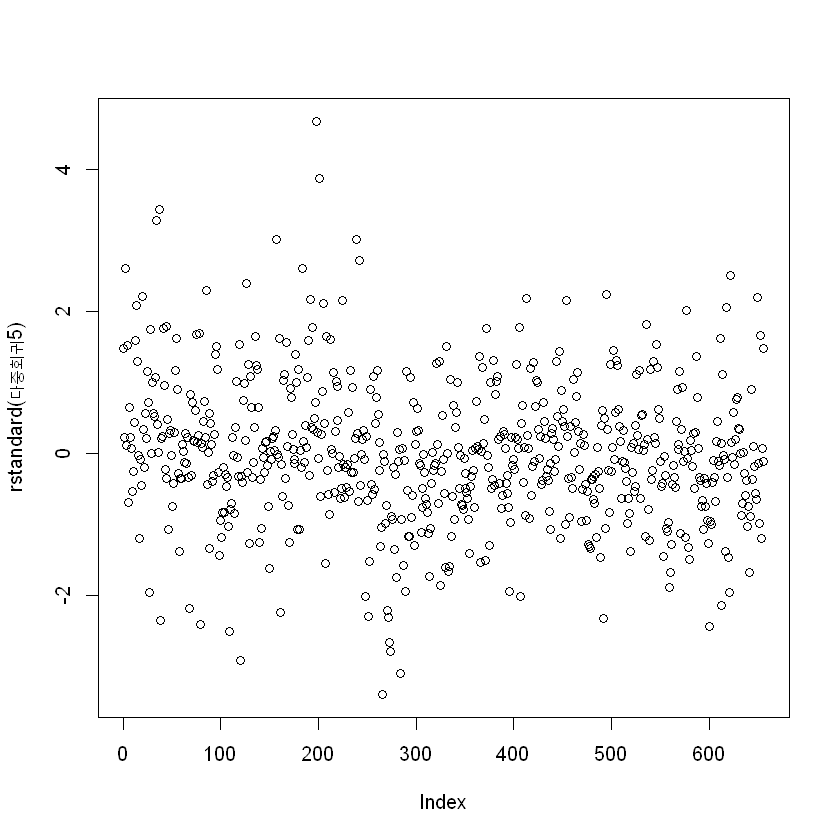

In [45]:
plot(rstandard(다중회귀5)) #잔차의 등분산성

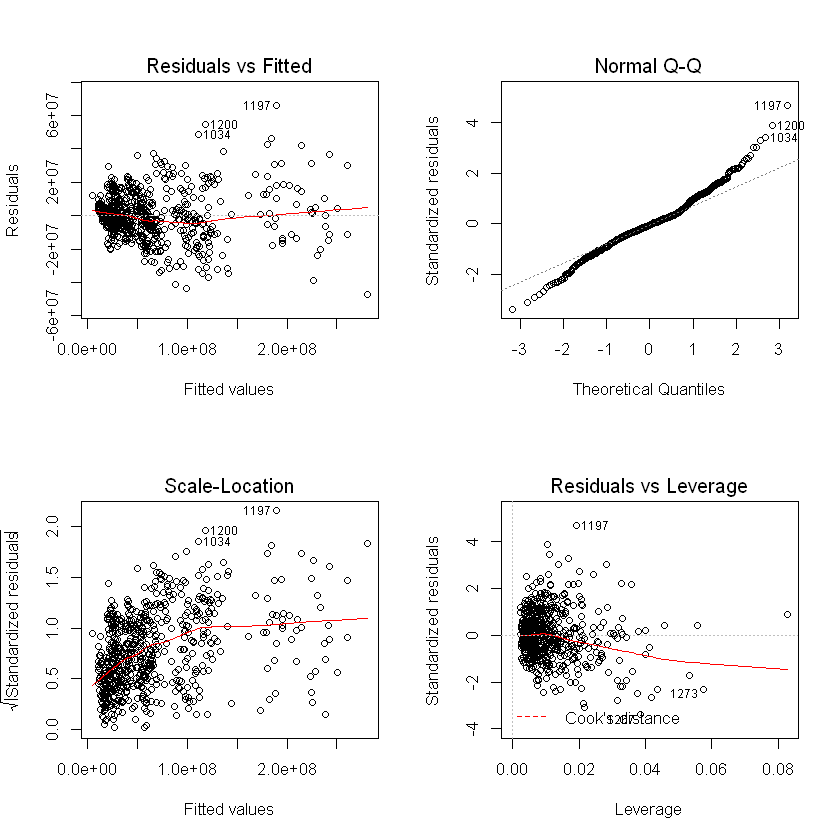

In [46]:
par(mfrow=c(2,2))
plot(다중회귀5)#잔차의 등분산성

# 3.정규성

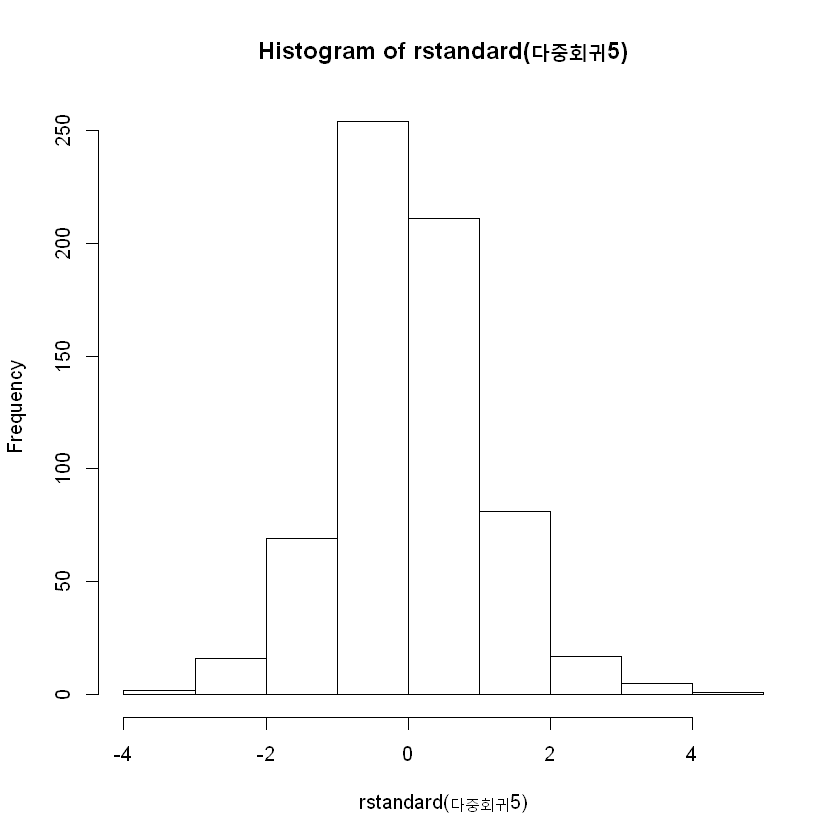

In [47]:
hist(rstandard(다중회귀5))#잔차의 정규성

In [48]:
shapiro.test(residuals(다중회귀5)) 
#귀무가설 = 정규분포와 차이가 없다. -> 기각 -> 정규분포와 차이가 있음.
#출처 : https://m.blog.naver.com/shoutjoy/221830887127


	Shapiro-Wilk normality test

data:  residuals(다중회귀5)
W = 0.9802, p-value = 9.456e-08


# ->예측이 아닌 유의미한 변수 추출이 목표이므로 공선성까지만 확인